# KNN Classification

### In this project   K-Nearest Neighbors model was built to predict whether Alzheimer is Demented  or Nondemented

### About Dataset


| ID |	Identification|
|:----------|:-----------|
|Group       	|Demented or Nondemented|
|Visit 	       |The visit number|
|M/F 	|          Gender|
|Hand           |Dominant Hand|
|Age| 	Age in years|
|Educ 	|Years of Education|
|SES| 	Socioeconomic Status|
|MMSE 	|Mini Mental State Examination|
|CDR| 	Clinical Dementia Rating|
|eTIV 	|Estimated Total Intracranial Volume|
|nWBV| 	Normalize Whole Brain Volume|
|ASF| 	Atlas Scaling Factor|
|Delay| 	Delay|

### Importing libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
df= pd.read_csv ("Alzheimer_Dataset.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Demented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Demented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Check for any missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  504 non-null    object 
 1   MRI ID      504 non-null    object 
 2   Group       504 non-null    object 
 3   Visit       504 non-null    int64  
 4   MR Delay    504 non-null    int64  
 5   Gender      504 non-null    object 
 6   Hand        504 non-null    object 
 7   Age         504 non-null    int64  
 8   EDUC        504 non-null    int64  
 9   SES         480 non-null    float64
 10  MMSE        502 non-null    float64
 11  CDR         504 non-null    float64
 12  eTIV        504 non-null    int64  
 13  nWBV        504 non-null    float64
 14  ASF         504 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 59.2+ KB


In [4]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Gender         0
Hand           0
Age            0
EDUC           0
SES           24
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
df['SES'].value_counts()

2.0    137
3.0    118
1.0    113
4.0    103
5.0      9
Name: SES, dtype: int64

In [6]:
df['SES'] = df['SES'].fillna(3.0)
df['MMSE'].fillna(df.MMSE.mean(),inplace=True)
df.isna().sum().sum()

0

### looking for the best relationships to build K-Nearest Neighbors   model on it

<AxesSubplot:>

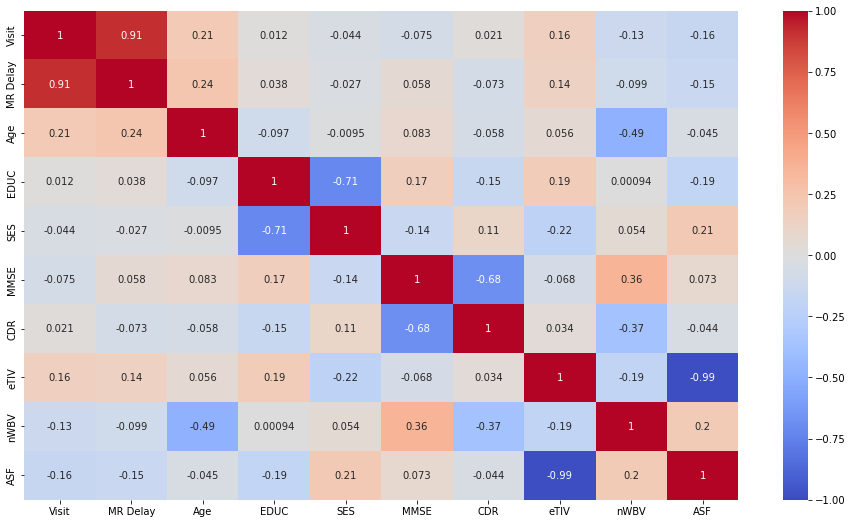

In [7]:
rel = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(rel, annot=True, vmax=1,vmin=-1,center=0,cmap='coolwarm')

In [8]:
df.drop(['Subject ID','MRI ID','Visit','MR Delay','Gender','Hand'],axis='columns',inplace=True)
df.head()

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Demented,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Demented,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,Demented,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,Demented,80,12,3.0,22.0,0.5,1698,0.701,1.034


### Since the Group column as a categorical data, we need to encode it to numerical values. 

In [9]:
df['Group'] = df['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
print(df.dtypes)
df.head()



Group      int64
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object


,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,1,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,1,80,12,3.0,22.0,0.5,1698,0.701,1.034


### creating features and label 

In [10]:
#split df into x and y
y = df['Group']
x = df.drop(['Group'], axis=1)


### splitting data into training and test set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.2, random_state=1)

### KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')


### fitting data to model

In [13]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

### Model predictions

In [14]:
knn_pred = knn.predict(x_test)

### Model evaluation

In [15]:
from sklearn.metrics import mean_squared_error ,r2_score ,accuracy_score, confusion_matrix
r2 = r2_score(y_test,knn_pred ) 
accuracy = accuracy_score(y_test,knn_pred)
mse = mean_squared_error (y_test,knn_pred)

print("r2_score            : ",r2)
print("accuracy            : ",accuracy)
print("mean_squared_error  : ",mse)


r2_score            :  0.18983957219251346
accuracy            :  0.8217821782178217
mean_squared_error  :  0.1782178217821782


### Confusion Matrix

In [16]:
def plot_confusion_matrix(y_test, knn_pred):
    cm = confusion_matrix(y_test, knn_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('ture labels')
    ax.set_title('Confusion Matrix', size=16); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])

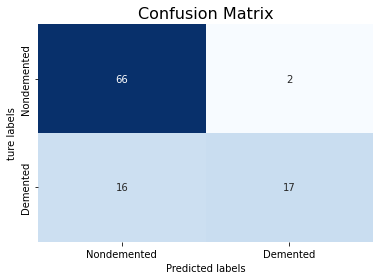

In [17]:
plt.figure(figsize=(6,4))
plot_confusion_matrix(y_test, knn_pred)

### K-fold cross validation

In [18]:
from sklearn.model_selection import cross_val_score
X_test =(x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test))
accler=cross_val_score(estimator=knn,X=x_test,y=y_test,cv=5)

C:\Users\YAZAN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\YAZAN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
for i in accler:
    print(i)  
print("-----------------")
print("the mean cross validation  : ",np.mean(accler))

0.6190476190476191
0.8
0.7
0.75
0.75
-----------------
the mean cross validation  :  0.7238095238095238
